In [656]:
!ls data

house_data_description.txt   house_test.csv
house_sample_submission.csv  house_train.csv


In [657]:
!head -3 data/house_train.csv

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PCo

In [658]:
!grep ',,' data/house_train.csv
!grep ',,' data/house_test.csv

In [659]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [660]:
# We won't specify column names/types because the data is small enough that we don't hit issues.
# 'NA' is used both as a categorical value in several of the columns and to represent NaNs.  
# We'll need to sort this out when we engineer features.
train = pd.read_csv('data/house_train.csv')
test = pd.read_csv('data/house_test.csv')

In [661]:
train_trans = pd.DataFrame()
test_trans = pd.DataFrame()

In [662]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [663]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [664]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [665]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [666]:
# Id
print train.Id.describe()
print
print test.Id.describe()

count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64

count    1459.000000
mean     2190.000000
std       421.321334
min      1461.000000
25%      1825.500000
50%      2190.000000
75%      2554.500000
max      2919.000000
Name: Id, dtype: float64


In [667]:
# Minimum 1, maximum 1460 for train, monotonically increasing.  A well behaved Id.
train.Id.is_monotonic_increasing

True

In [668]:
# Minimum 1, maximum 1459 for test, monotonically increasing.  A well behaved Id.
test.Id.is_monotonic_increasing

True

In [669]:
# MSSubClass
# Categorical variable indicating type of dwelling.  Implemented as a number so needs to treated carefully as a categorical.
# Convert to string to facilitate this.
train.MSSubClass = train.MSSubClass.astype(np.str)
test.MSSubClass = test.MSSubClass.astype(np.str)

In [670]:
train.MSSubClass.value_counts().sort_values(ascending=False)

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

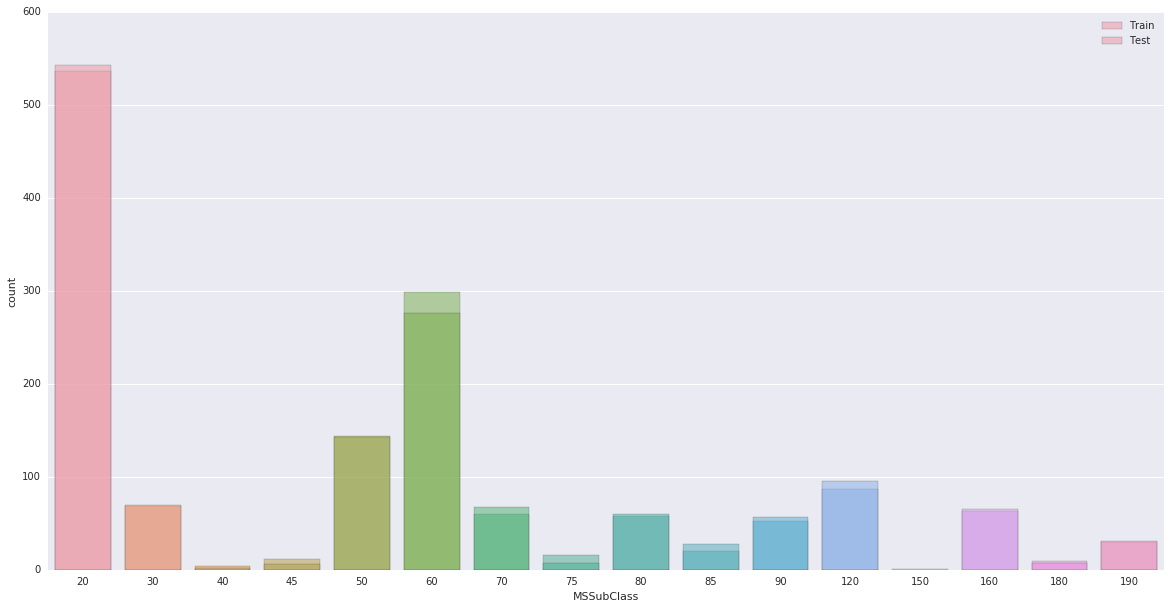

In [671]:
# Good correspondence between train and test distributions.
plt.figure(figsize=(20,10))

order = '20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190'.split(', ')

sns.countplot(train.MSSubClass, label='Train', alpha=0.5, order=order)
sns.countplot(test.MSSubClass, label='Test', alpha=0.5, order=order)

plt.legend()
plt.show()

In [672]:
binarizer = preprocessing.LabelBinarizer()
binarizer.fit(train.MSSubClass)

train_trans = pd.concat([train_trans, pd.DataFrame(binarizer.transform(train.MSSubClass), columns=['MSSubClass_%s'%s for s in binarizer.classes_])], axis=1)
test_trans = pd.concat([test_trans, pd.DataFrame(binarizer.transform(test.MSSubClass), columns=['MSSubClass_%s'%s for s in binarizer.classes_])], axis=1)

train_trans.head()

,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [673]:
# MSZoning
# Categorical variable indicating type of zoning classification.
print train.MSZoning.unique(), '\n', train.MSZoning.value_counts()
print
# There are Nans in the test dataset.
print test.MSZoning.unique(), '\n', test.MSZoning.value_counts()

['RL' 'RM' 'C (all)' 'FV' 'RH'] 
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

['RH' 'RL' 'RM' 'FV' 'C (all)' nan] 
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64


In [674]:
# This is an intersting one because there are NaNs in the test dataset but not the training dataset.
# It's a small number so not a big worry but we'll do two things.
# 1) Add a new label for the NaN.
# 2) Add a new column to capture the NaN information.
train_trans['MSZoning'] = train.MSZoning
train_trans['MSZoning_NaN'] = (train.MSZoning.isnull()).astype(np.int)
train_trans.MSZoning = train_trans.MSZoning.fillna('UNK')

test_trans['MSZoning'] = test.MSZoning.copy()
test_trans['MSZoning_NaN'] = (test.MSZoning.isnull()).astype(np.int)
test_trans.MSZoning = test_trans.MSZoning.fillna('UNK')

test_trans.head()

,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning,MSZoning_NaN
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,RH,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,RL,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,RL,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,RL,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,RL,0


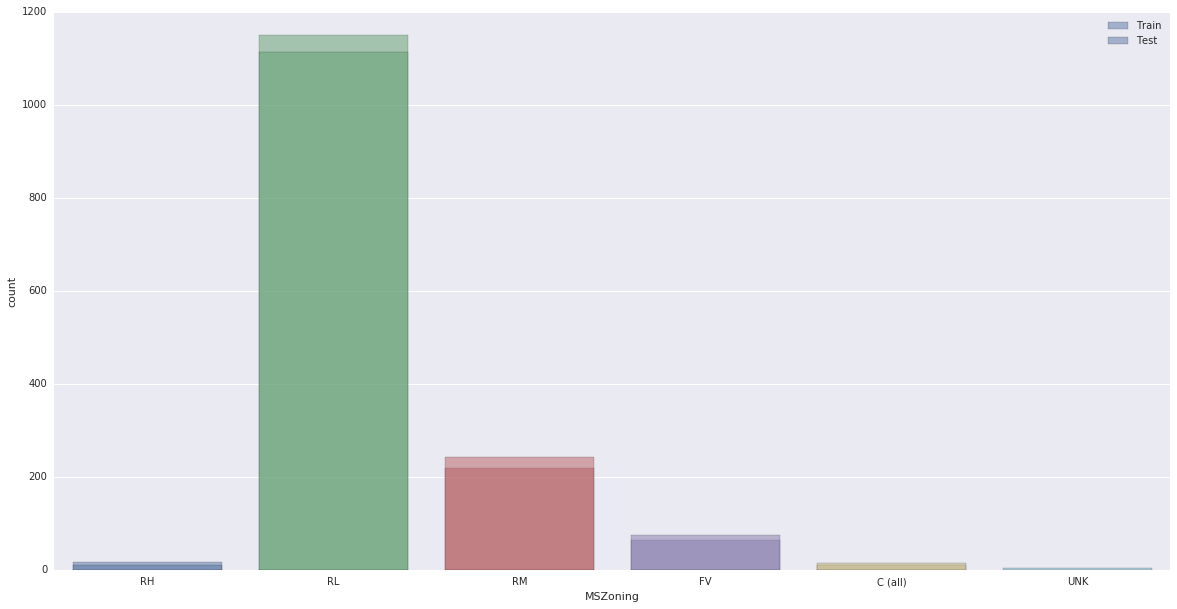

In [675]:
# Good correspondence between train and test distributions.
plt.figure(figsize=(20,10))

sns.countplot(train_trans.MSZoning, label='Train', alpha=0.5, order=['RH', 'RL', 'RM', 'FV', 'C (all)', 'UNK'])
sns.countplot(test_trans.MSZoning, label='Test', alpha=0.5, order=['RH', 'RL', 'RM', 'FV', 'C (all)', 'UNK'])

plt.legend()
plt.show()

In [676]:
binarizer = preprocessing.LabelBinarizer()
binarizer.fit(train.MSZoning)

train_trans = pd.concat([train_trans, pd.DataFrame(binarizer.transform(train_trans.MSZoning), columns=['MSZoning_%s'%s for s in binarizer.classes_])], axis=1)
test_trans = pd.concat([test_trans, pd.DataFrame(binarizer.transform(test_trans.MSZoning), columns=['MSZoning_%s'%s for s in binarizer.classes_])], axis=1)

train_trans.drop('MSZoning', axis=1, inplace=True)
test_trans.drop('MSZoning', axis=1, inplace=True)

In [677]:
# LotFrontage
# Continuous variable indicating length of property abutting street.

# Missing values in both train and test because a property might not abut a street, 'NA' used in this case.
print train.LotFrontage.describe()
print
print test.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

count    1232.000000
mean       68.580357
std        22.376841
min        21.000000
25%        58.000000
50%        67.000000
75%        80.000000
max       200.000000
Name: LotFrontage, dtype: float64


In [678]:
# Missing values in both training and test datasets...
# We'll do two things.
# 1) Create a column LotFrontage_NaN.
# 2) Backfill LotFrontage NaNs with median.  TODO: Think about this, maybe 0?

train_trans['LotFrontage'] = train.LotFrontage
train_trans['LotFrontage_NaN'] = (train_trans.LotFrontage.isnull()).astype(np.int)
train_trans.LotFrontage = train_trans.LotFrontage.fillna(train_trans.LotFrontage.median())

test_trans['LotFrontage'] = test.LotFrontage
test_trans['LotFrontage_NaN'] = (test_trans.LotFrontage.isnull()).astype(np.int)
test_trans.LotFrontage = test_trans.LotFrontage.fillna(test_trans.LotFrontage.median())

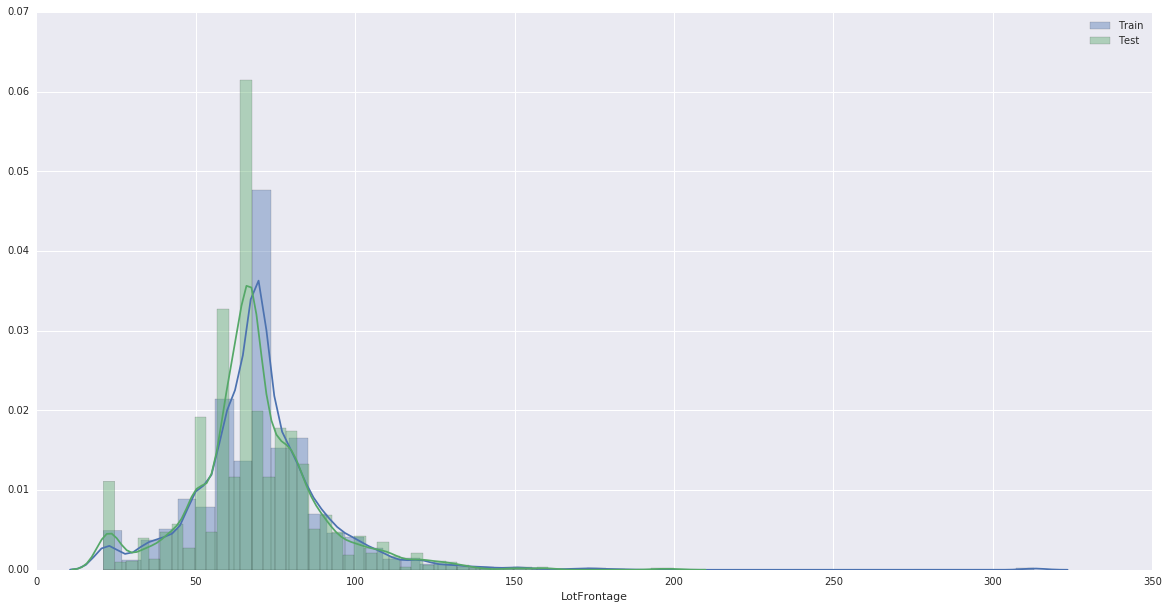

In [679]:
# Distribution looks OK except for outliers.
plt.figure(figsize=(20,10))

sns.distplot(train_trans.LotFrontage, label='Train')
sns.distplot(test_trans.LotFrontage, label='Test')

plt.legend()
plt.show()

In [680]:
train_trans['LotFrontage_313'] = (train_trans.LotFrontage > 300).astype(np.int)
train_trans.loc[train_trans.LotFrontage > 300, 'LotFrontage'] = test_trans.LotFrontage.median()

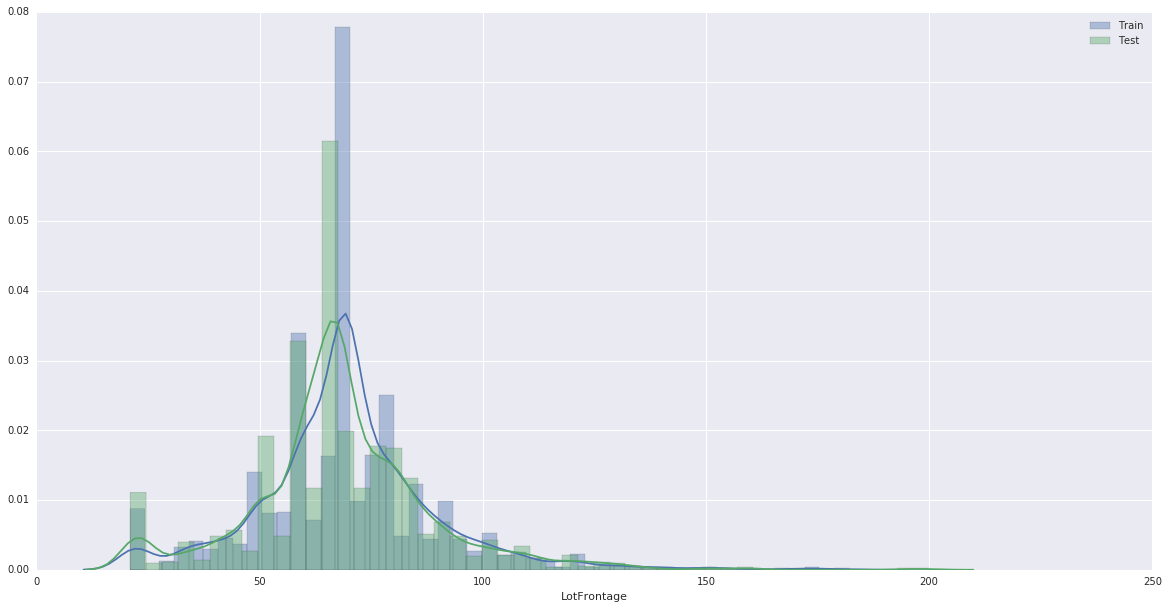

In [681]:
plt.figure(figsize=(20,10))

sns.distplot(train_trans.LotFrontage, label='Train')
sns.distplot(test_trans.LotFrontage, label='Test')

plt.legend()
plt.show()

In [682]:
scaler = preprocessing.StandardScaler()
scaler.fit(train_trans.LotFrontage.values.reshape(-1,1))

train_trans['LotFrontage_scaled'] = scaler.transform(train_trans.LotFrontage.values.reshape(-1,1))
test_trans['LotFrontage_scaled'] = scaler.transform(test_trans.LotFrontage.values.reshape(-1,1))

train_trans = train_trans.drop(['LotFrontage'], axis=1)
test_trans = test_trans.drop(['LotFrontage'], axis=1)

print train_trans.LotFrontage_scaled.describe()
print
print test_trans.LotFrontage_scaled.describe()

count    1.460000e+03
mean     2.445532e-16
std      1.000343e+00
min     -2.414880e+00
25%     -4.740866e-01
50%     -2.621127e-02
75%      4.714280e-01
max      5.597113e+00
Name: LotFrontage_scaled, dtype: float64

count    1459.000000
mean       -0.059330
std         1.023605
min        -2.414880
25%        -0.474087
50%        -0.125739
75%         0.421664
max         6.492863
Name: LotFrontage_scaled, dtype: float64


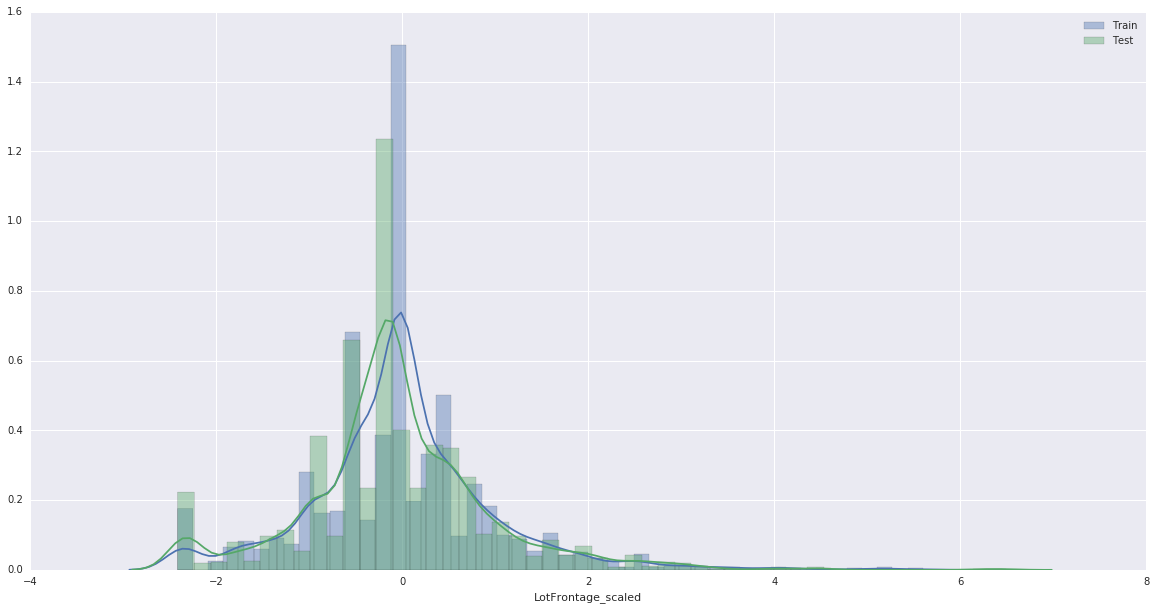

In [683]:
# Distribution and scale both look good.
plt.figure(figsize=(20,10))

sns.distplot(train_trans.LotFrontage_scaled, label='Train')
sns.distplot(test_trans.LotFrontage_scaled, label='Test')

plt.legend()
plt.show()

In [684]:
# LotArea
# Continuous variable indicating area of the property.

# No missing values.
print train.LotArea.describe()
print
print test.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

count     1459.000000
mean      9819.161069
std       4955.517327
min       1470.000000
25%       7391.000000
50%       9399.000000
75%      11517.500000
max      56600.000000
Name: LotArea, dtype: float64


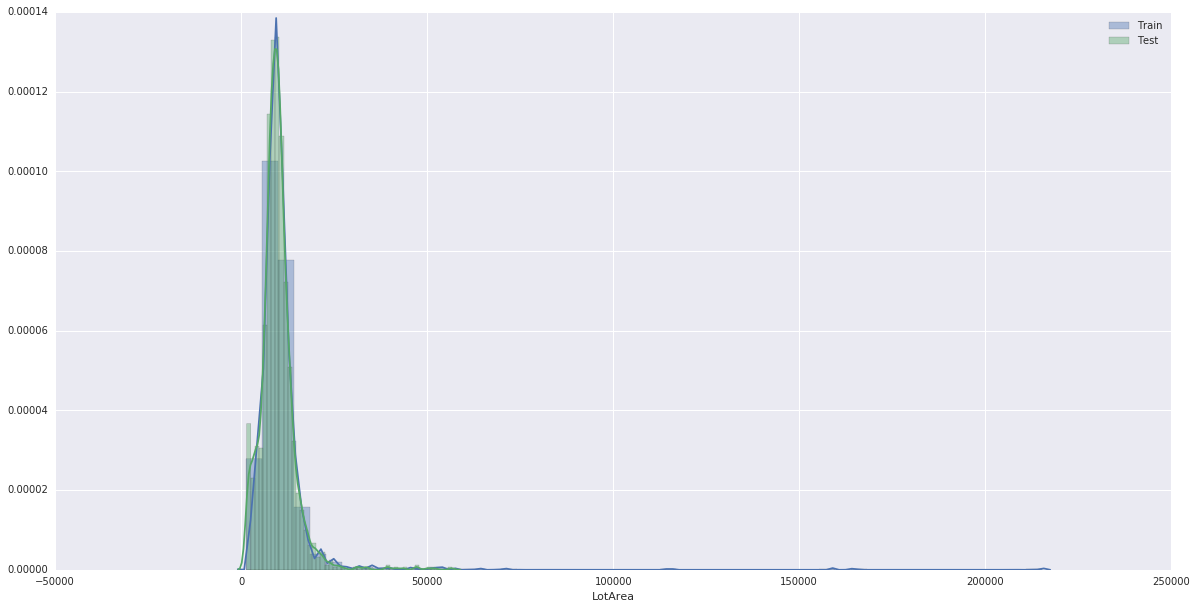

In [685]:
# Distribution skewed by outliers.
# We'll do two things. 1) Create a new column to hold >30K test. 2) Set values >30K to 0
plt.figure(figsize=(20,10))

sns.distplot(train.LotArea, label='Train')
sns.distplot(test.LotArea, label='Test')

plt.legend()
plt.show()

In [686]:
train_trans['LotArea'] = train.LotArea
train_trans['LotArea_30000_Plus'] = (train.LotArea >= 30000).astype(np.int)
train_trans.loc[train_trans.LotArea >= 30000, 'LotArea'] = 0

test_trans['LotArea'] = test.LotArea
test_trans['LotArea_30000_Plus'] = (test.LotArea >= 30000).astype(np.int)
test_trans.loc[test_trans.LotArea >= 30000, 'LotArea'] = 0

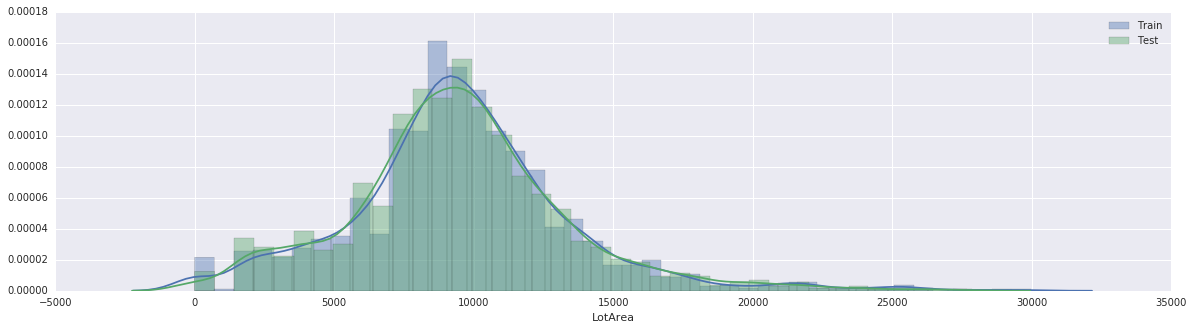

In [687]:
# Distribution looks good for training and test datasets.
plt.figure(figsize=(20,5))

sns.distplot(train_trans.LotArea, label='Train')
sns.distplot(test_trans.LotArea, label='Test')

plt.legend()
plt.show()

In [688]:
scaler = preprocessing.StandardScaler()
scaler.fit(train_trans.LotArea.values.reshape(-1,1).astype(np.float))

train_trans['LotArea_scaled'] = scaler.transform(train_trans.LotArea.values.reshape(-1,1).astype(np.float))
test_trans['LotArea_scaled'] = scaler.transform(test_trans.LotArea.values.reshape(-1,1).astype(np.float))

train_trans = train_trans.drop(['LotArea'], axis=1)
test_trans = test_trans.drop(['LotArea'], axis=1)

print train_trans.LotArea_scaled.describe()
print
print test_trans.LotArea_scaled.describe()

count    1.460000e+03
mean    -5.110068e-17
std      1.000343e+00
min     -2.357359e+00
25%     -5.261123e-01
50%     -4.150550e-02
75%      4.690602e-01
max      5.067001e+00
Name: LotArea_scaled, dtype: float64

count    1459.000000
mean       -0.016793
std         0.974548
min        -2.357359
25%        -0.551018
50%        -0.040266
75%         0.464042
max         4.506438
Name: LotArea_scaled, dtype: float64


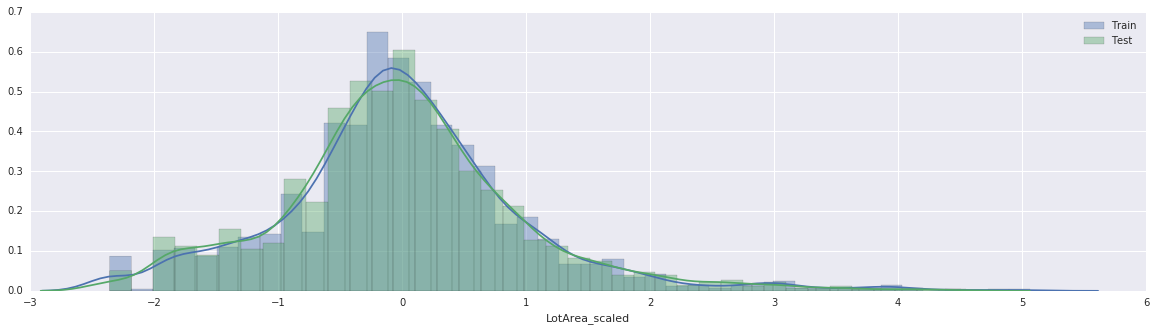

In [689]:
# Distribution looks good for training and test datasets.
plt.figure(figsize=(20,5))

sns.distplot(train_trans.LotArea_scaled, label='Train')
sns.distplot(test_trans.LotArea_scaled, label='Test')

plt.legend()
plt.show()

In [690]:
# Street
# Categorical variable indicating type of road
print train.Street.value_counts()
print
print test.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

Pave    1453
Grvl       6
Name: Street, dtype: int64


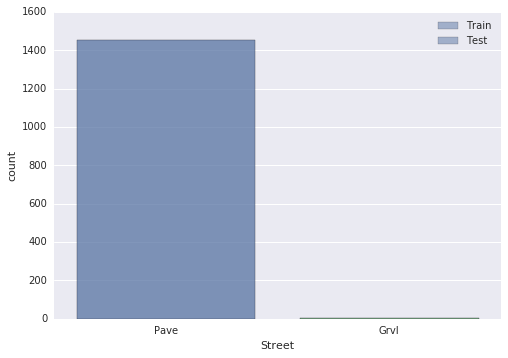

In [691]:
# Almost identical distribution.
plt.figure()

sns.countplot(train.Street, label='Train', alpha=0.5)
sns.countplot(test.Street, label='Test', alpha=0.5)

plt.legend()
plt.show()

In [692]:
train_trans['Street'] = train.Street
test_trans['Street'] = test.Street

binarizer = preprocessing.LabelBinarizer()
binarizer.fit(train_trans.Street)

train_trans = pd.concat([train_trans, pd.DataFrame(binarizer.transform(train_trans.Street), columns=['Street_%s'%binarizer.classes_[0]])], axis=1)
test_trans = pd.concat([test_trans, pd.DataFrame(binarizer.transform(test_trans.Street), columns=['Street_%s'%binarizer.classes_[0]])], axis=1)

train_trans.drop('Street', axis=1, inplace=True)
test_trans.drop('Street', axis=1, inplace=True)

In [693]:
# Alley
# Categorical variable indicating type of alley.
# In this case raw data contains NA (meaning No Alley) which have been interpreted as NaNs so we'll change this back.
print train.Alley.describe()
print
print test.Alley.describe()

count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object

count      107
unique       2
top       Grvl
freq        70
Name: Alley, dtype: object


In [694]:
train_trans['Alley'] = train.Alley.fillna('NA')
test_trans['Alley'] = test.Alley.fillna('NA')

In [695]:
print train_trans.Alley.describe()
print
print test_trans.Alley.describe()

count     1460
unique       3
top         NA
freq      1369
Name: Alley, dtype: object

count     1459
unique       3
top         NA
freq      1352
Name: Alley, dtype: object


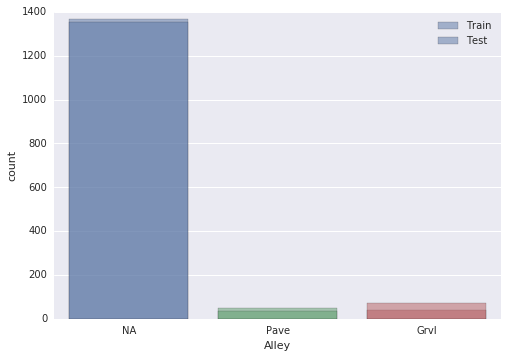

In [696]:
# Very similar distributions.
plt.figure()

sns.countplot(train_trans.Alley, label='Train', alpha=0.5)
sns.countplot(test_trans.Alley, label='Test', alpha=0.5)

plt.legend()
plt.show()

In [697]:
binarizer = preprocessing.LabelBinarizer()
binarizer.fit(train_trans.Alley)

train_trans = pd.concat([train_trans, pd.DataFrame(binarizer.transform(train_trans.Alley), columns=['Alley_%s'%s for s in binarizer.classes_])], axis=1)
test_trans = pd.concat([test_trans, pd.DataFrame(binarizer.transform(test_trans.Alley), columns=['Alley_%s'%s for s in binarizer.classes_])], axis=1)

train_trans.drop('Alley', axis=1, inplace=True)
test_trans.drop('Alley', axis=1, inplace=True)

In [698]:
# Lot Shape
# Categorical variable indicating shape of lot.
print train.LotShape.describe()
print
print test.LotShape.describe()

count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object

count     1459
unique       4
top        Reg
freq       934
Name: LotShape, dtype: object


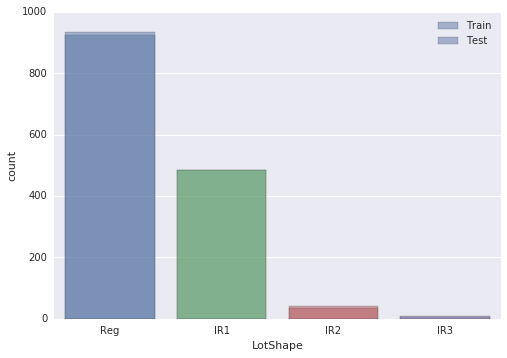

In [699]:
# Very similar distributions.
plt.figure()

sns.countplot(train.LotShape, label='Train', alpha=0.5)
sns.countplot(test.LotShape, label='Test', alpha=0.5)

plt.legend()
plt.show()

In [700]:
binarizer = preprocessing.LabelBinarizer()
binarizer.fit(train.LotShape)

train_trans = pd.concat([train_trans, pd.DataFrame(binarizer.transform(train.LotShape), columns=['LotShape_%s'%s for s in binarizer.classes_])], axis=1)
test_trans = pd.concat([test_trans, pd.DataFrame(binarizer.transform(test.LotShape), columns=['LotShape_%s'%s for s in binarizer.classes_])], axis=1)

In [701]:
# LandContour
# Categorical variable indicating the flatness of the property
# No missing values
print train.LandContour.describe()
print
print test.LandContour.describe()

count     1460
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object

count     1459
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object


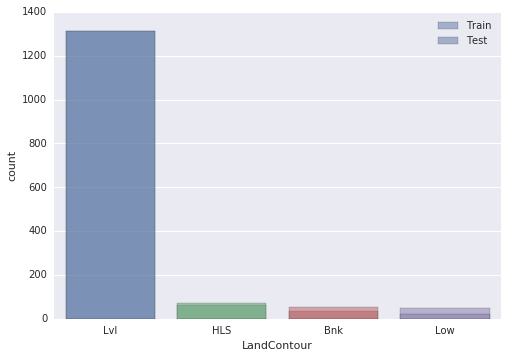

In [702]:
# Very similar distributions.
plt.figure()

sns.countplot(train.LandContour, label='Train', alpha=0.5)
sns.countplot(test.LandContour, label='Test', alpha=0.5)

plt.legend()
plt.show()

In [703]:
binarizer = preprocessing.LabelBinarizer()
binarizer.fit(train.LandContour)

train_trans = pd.concat([train_trans, pd.DataFrame(binarizer.transform(train.LandContour), columns=['LandContour_%s'%s for s in binarizer.classes_])], axis=1)
test_trans = pd.concat([test_trans, pd.DataFrame(binarizer.transform(test.LandContour), columns=['LandContour_%s'%s for s in binarizer.classes_])], axis=1)

In [704]:
# Utilities
# Categorical variable indicating the types of utilities available.
print train.Utilities.describe()
print
# Missing values
# We'll do two things. 1) Retain the binary test for NaN in a separate column. 2) Fill NaN with 'None'
print test.Utilities.describe()

count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object

count       1457
unique         1
top       AllPub
freq        1457
Name: Utilities, dtype: object


In [705]:
train_trans['Utilities'] = train.Utilities
train_trans['Utilities_Nan'] = (train.Utilities.isnull()).astype(np.int)
train_trans.Utilities = train_trans.Utilities.fillna('None')

test_trans['Utilities'] = test.Utilities
test_trans['Utilities_Nan'] = (test.Utilities.isnull()).astype(np.int)
test_trans.Utilities = test_trans.Utilities.fillna('None')

In [706]:
binarizer = preprocessing.LabelBinarizer()
binarizer.fit(train_trans.Utilities)

train_trans = pd.concat([train_trans, pd.DataFrame(binarizer.transform(train_trans.Utilities), columns=['Utilities_%s' % binarizer.classes_[0]])], axis=1)
test_trans = pd.concat([test_trans, pd.DataFrame(binarizer.transform(test_trans.Utilities), columns=['Utilities_%s' % binarizer.classes_[0]])], axis=1)

train_trans = train_trans.drop(['Utilities'], axis=1)
test_trans = test_trans.drop(['Utilities'], axis=1)

In [707]:
# LotConfig
print train.LotConfig.describe()
print
print test.LotConfig.describe()

count       1460
unique         5
top       Inside
freq        1052
Name: LotConfig, dtype: object

count       1459
unique         5
top       Inside
freq        1081
Name: LotConfig, dtype: object


In [708]:
print train.LotConfig.value_counts()
print
print test.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64


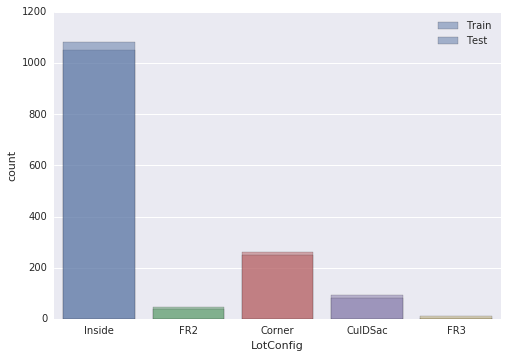

In [709]:
# Very similar distributions.
plt.figure()

order = train.LotConfig.unique()

sns.countplot(train.LotConfig, label='Train', alpha=0.5, order=order)
sns.countplot(test.LotConfig, label='Test', alpha=0.5, order=order)

plt.legend()
plt.show()

In [710]:
binarizer = preprocessing.LabelBinarizer()
binarizer.fit(train.LotConfig)

train_trans = pd.concat([train_trans, pd.DataFrame(binarizer.transform(train.LotConfig), columns=['LotConfig_%s' % s for s in binarizer.classes_])], axis=1)
test_trans = pd.concat([test_trans, pd.DataFrame(binarizer.transform(test.LotConfig), columns=['LotConfig_%s' % s for s in binarizer.classes_])], axis=1)

In [711]:
#LandSlope
print train.LandSlope.describe()
print
print test.LandSlope.describe()

count     1460
unique       3
top        Gtl
freq      1382
Name: LandSlope, dtype: object

count     1459
unique       3
top        Gtl
freq      1396
Name: LandSlope, dtype: object


In [712]:
print train.LandSlope.value_counts()
print
print train.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


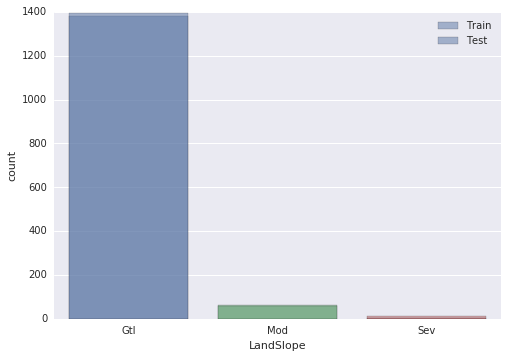

In [713]:
plt.figure()

sns.countplot(train.LandSlope, label='Train', alpha=0.5)
sns.countplot(test.LandSlope, label='Test', alpha=0.5)

plt.legend()
plt.show()

In [714]:
binarizer = preprocessing.LabelBinarizer()
binarizer.fit(train.LandSlope)

train_trans = pd.concat([train_trans, pd.DataFrame(binarizer.transform(train.LandSlope), columns=['LandSlope_%s' % s for s in binarizer.classes_])], axis=1)
test_trans = pd.concat([test_trans, pd.DataFrame(binarizer.transform(test.LandSlope), columns=['LandSlope_%s' % s for s in binarizer.classes_])], axis=1)

In [715]:
# Neighborhood
# Categorical variable indicating location within city.
print train.Neighborhood.value_counts()
print
print test.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64


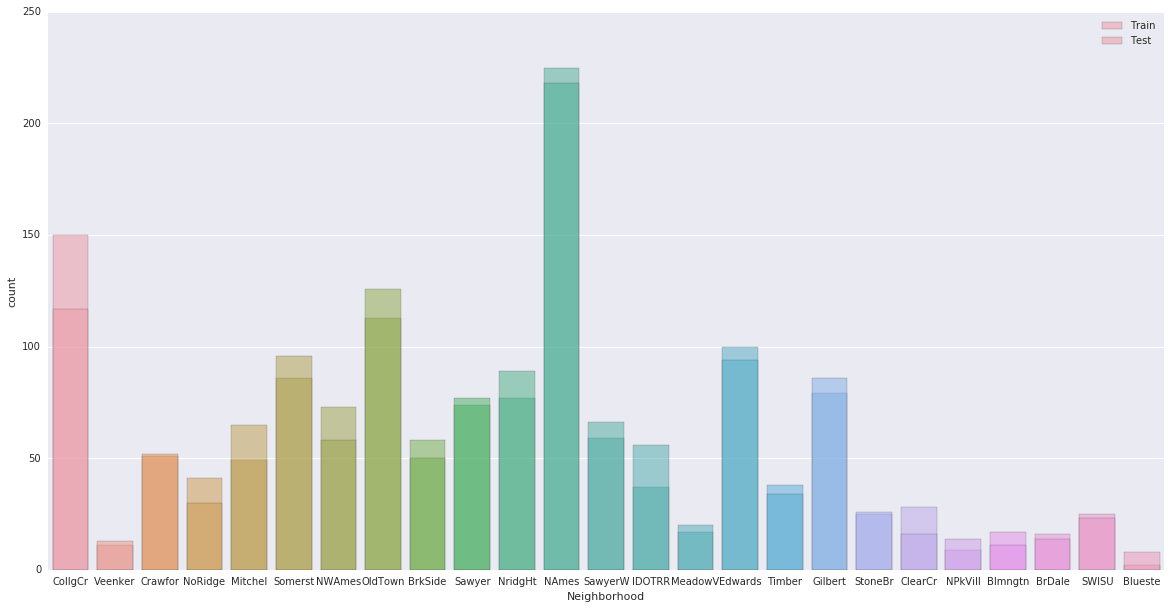

In [716]:
plt.figure(figsize=(20,10))

order = train.Neighborhood.unique()

sns.countplot(train.Neighborhood, label='Train', alpha=0.5, order=order)
sns.countplot(test.Neighborhood, label='Test', alpha=0.5, order=order)

plt.legend()
plt.show()

In [717]:
binarizer = preprocessing.LabelBinarizer()
binarizer.fit(train.Neighborhood)

train_trans = pd.concat([train_trans, pd.DataFrame(binarizer.transform(train.Neighborhood), columns=['Neighborhood_%s' % s for s in binarizer.classes_])], axis=1)
test_trans = pd.concat([test_trans, pd.DataFrame(binarizer.transform(test.Neighborhood), columns=['Neighborhood_%s' % s for s in binarizer.classes_])], axis=1)

In [718]:
# Condition1
# Categorical variable representing proximity to various conditions
print train.Condition1.value_counts()
print
print test.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

Norm      1251
Feedr       83
Artery      44
RRAn        24
PosN        20
RRAe        17
PosA        12
RRNn         4
RRNe         4
Name: Condition1, dtype: int64


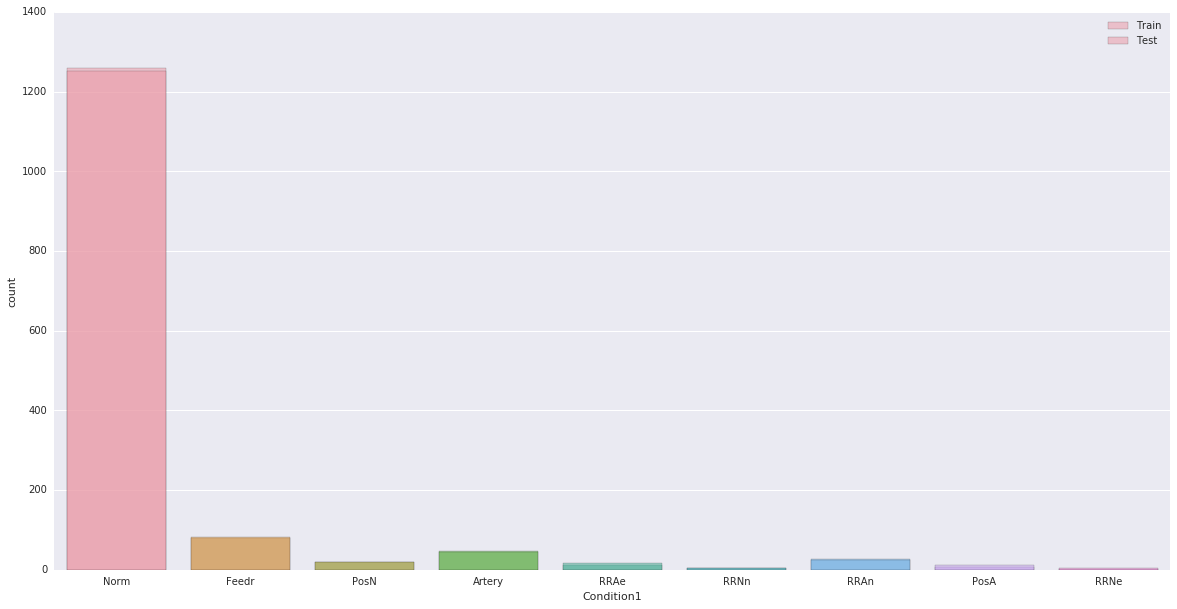

In [719]:
plt.figure(figsize=(20,10))

order = train.Condition1.unique()

sns.countplot(train.Condition1, label='Train', alpha=0.5, order=order)
sns.countplot(test.Condition1, label='Test', alpha=0.5, order=order)

plt.legend()
plt.show()

In [720]:
binarizer = preprocessing.LabelBinarizer()
binarizer.fit(train.Condition1)

train_trans = pd.concat([train_trans, pd.DataFrame(binarizer.transform(train.Condition1), columns=['Condition1_%s' % s for s in binarizer.classes_])], axis=1)
test_trans = pd.concat([test_trans, pd.DataFrame(binarizer.transform(test.Condition1), columns=['Condition1_%s' % s for s in binarizer.classes_])], axis=1)

In [721]:
# Condition2
# Categorical variable representing proximity to various conditions (if more than one present)
print train.Condition2.value_counts()
print
print test.Condition2.value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

Norm      1444
Feedr        7
Artery       3
PosA         3
PosN         2
Name: Condition2, dtype: int64


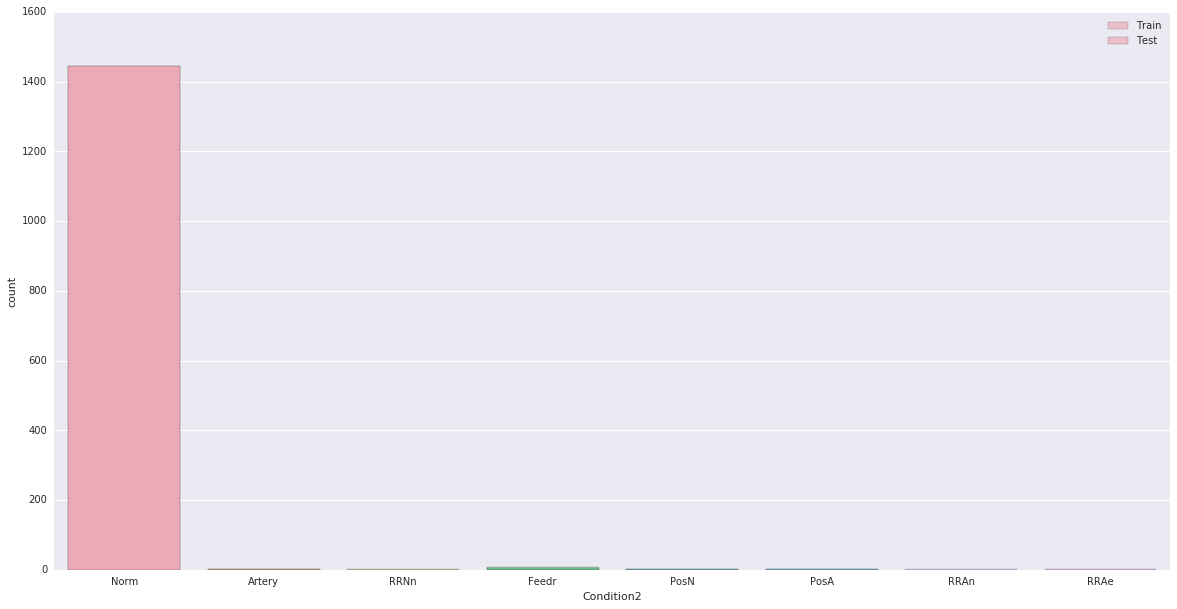

In [722]:
plt.figure(figsize=(20,10))

order = train.Condition2.unique()

sns.countplot(train.Condition2, label='Train', alpha=0.5, order=order)
sns.countplot(test.Condition2, label='Test', alpha=0.5, order=order)

plt.legend()
plt.show()

In [723]:
binarizer = preprocessing.LabelBinarizer()
binarizer.fit(train.Condition2)

train_trans = pd.concat([train_trans, pd.DataFrame(binarizer.transform(train.Condition2), columns=['Condition2_%s' % s for s in binarizer.classes_])], axis=1)
test_trans = pd.concat([test_trans, pd.DataFrame(binarizer.transform(test.Condition2), columns=['Condition2_%s' % s for s in binarizer.classes_])], axis=1)

In [724]:
# BldgType
# Categorical variable indicating type of dwelling.
print train.BldgType.describe()
print
print test.BldgType.describe()
print
print train.BldgType.value_counts()
print
print test.BldgType.value_counts()

count     1460
unique       5
top       1Fam
freq      1220
Name: BldgType, dtype: object

count     1459
unique       5
top       1Fam
freq      1205
Name: BldgType, dtype: object

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

1Fam      1205
TwnhsE     113
Duplex      57
Twnhs       53
2fmCon      31
Name: BldgType, dtype: int64


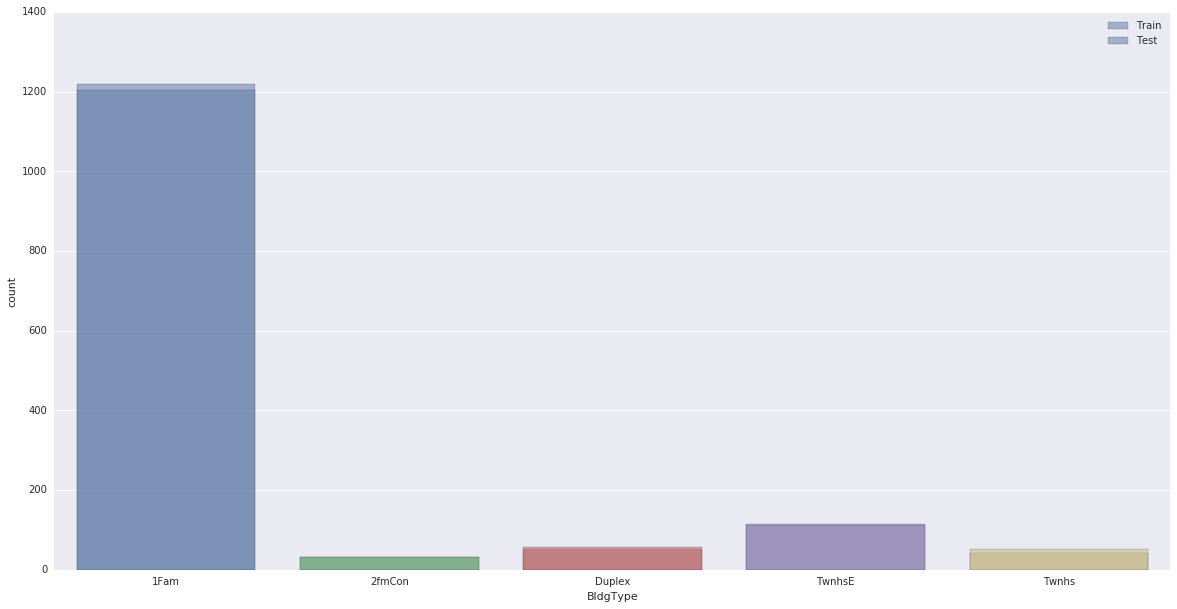

In [725]:
plt.figure(figsize=(20,10))

order = train.BldgType.unique()

sns.countplot(train.BldgType, label='Train', alpha=0.5, order=order)
sns.countplot(test.BldgType, label='Test', alpha=0.5, order=order)

plt.legend()
plt.show()

In [726]:
binarizer = preprocessing.LabelBinarizer()
binarizer.fit(train.BldgType)

train_trans = pd.concat([train_trans, pd.DataFrame(binarizer.transform(train.BldgType), columns=['BldgType_%s' % s for s in binarizer.classes_])], axis=1)
test_trans = pd.concat([test_trans, pd.DataFrame(binarizer.transform(test.BldgType), columns=['BldgType_%s' % s for s in binarizer.classes_])], axis=1)